# 两种评价指标
## (1) MRR: Mean Reciprocal Rank
  Reciprocal rank是指第一个正确答案的排名的倒数。MRR是指多个查询语句的排名倒数的均值。公式如下：
      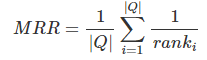
  MRR假设每一个Query只有一个最标准的答案（每一个repo只有一个最匹配的team），与我们的问题不太一致，因此我根据NDCG对MRR做了一些改变。
## (2) NDCG: Normalized Discounted Cumulative Gain
### Cumulative Gain(CG)：
  表示前p个位置累计得到的效益，公式如下：
  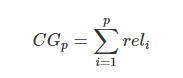
  这里我取rel_i为1和0，分别表示推荐得到的team事实上有或没有参与该repo。
### Discounted cumulative gain(DCG)：
   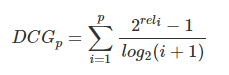
   按排序给每个位置上的相关度加上了权重。由于rel_i取值{0,1}，分子的值也分别对应0和1。
### Ideal DCG(IDCG)：
   IDCG是理想情况下的DCG，即对于一个查询语句和p来说，DCG的最大值。公式如下： 
   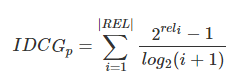
   对于我们的实验来说，IDCG就是所有参与了当前repo的team都被推荐到列表最前列时计算出的DCG值。
### Normalized DCG(nDCG)：
   由于每个查询语句所能检索到的结果文档集合长度不一，p值的不同会对DCG的计算有较大的影响。所以不能对不同查询语句的DCG进行求平均，需要进行归一化处理。nDCG就是用IDCG进行归一化处理，表示当前DCG比IDCG还差多大的距离。公式如下：
   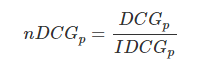

In [1]:
import pandas as pd
import json

recommendations = {}
with open('recommenda_euclidean.json') as rj:
    for l in rj.readlines():
        line = l.strip().split('\t')
        repo = line[0]
        recs = [json.loads(t)[1] for t in line[1:]]
        recommendations[repo] = recs[::-1]
        
team_target = {}
with open('team_profiles.json') as tj:
    for tl in tj.readlines():
        line = tl.split('\t')
        team = line[0]
        profile = json.loads(line[1])
        team_target[team] = profile['target']
print(list(team_target.items())[0])
print(list(recommendations.items())[0])

('["AMorporkian", "kharidiron"]', 'StarryPy/StarryPy')
('0-afflatus/grail_test', ['["TurkeyMan", "starkos", "tvandijck", "ardneran", "akaStiX", "samsinsane"]', '["marikisthar", "EerieCode", "kenpazaraki", "YgoPro-Sahim", "MichaelLawrenceDee", "ClementLouis", "AndreOliveiraMendes", "Gideon9212", "KServantes", "TharmB", "AlphaKretin"]', '["karai17", "Bobbyjoness"]', '["tekkub", "ckaotik"]', '["renbear67", "sayterdarkwynd", "NotMrFlibble"]', '["Excrulon", "TehSeph", "cyrilpangilinan", "mc-crafty"]', '["X-Coder", "SnakeSVx", "generalwrex", "nirahiel"]', '["AbigailBuccaneer", "Grocel", "PhoenixBlack", "TomyLobo", "Nebual", "Python1320"]', '["WillTheDoggy", "wuaw"]', '["Joschasa", "Tommy228", "CSchulz", "ZachPL", "Heyter", "iViscosity"]'])


In [2]:
def NRR(repo,rec,team_target):
    mrr = 0
    for i,tm in enumerate(rec):
        if tm in team_target and repo == team_target[tm]:
            mrr += 1/(i+1)
    target_cnt = 0
    irr =  0
    for tm in team_target:
        target = team_target[tm]
        if target == repo:
            target_cnt += 1
            irr += 1/target_cnt
#     print(irr)
    mrr /= irr
    return mrr

item = list(recommendations.items())[0]
print(NRR(item[0],item[1],team_target))

0.0


In [3]:
import numpy as np
def NDCG(repo,rec,team_target):
    dcg = 0
    for i,tm in enumerate(rec):
        if tm in team_target and repo == team_target[tm]:
            dcg += 1/np.log2(i+2)
    target_cnt = 0
    idcg =  0
    for tm in team_target:
        target = team_target[tm]
        if target == repo:
            target_cnt += 1
            idcg += 1/np.log2(target_cnt+1)
    dcg /= idcg
    return dcg

item = list(recommendations.items())[0]
print(NDCG(item[0],item[1],team_target))

0.0


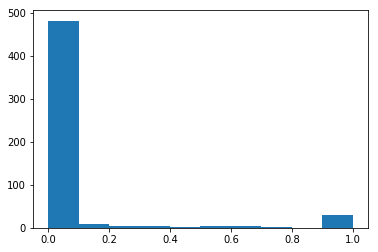

In [6]:
from matplotlib import pyplot as plt

NRRs = []
for repo in recommendations:
    NRRs.append(NRR(repo,recommendations[repo],team_target))
plt.hist(NRRs)
plt.show()

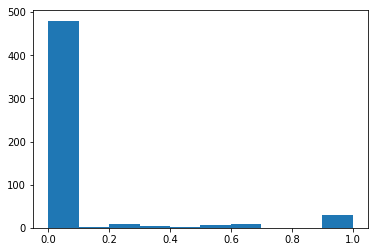

In [5]:
NDCGs = []
for repo in recommendations:
    NDCGs.append(NDCG(repo,recommendations[repo],team_target))
plt.hist(NDCGs)
plt.show()